# **mobile**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 1234
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/mobile_re.csv')

In [ ]:
dataset=dataset[['body','rating']]

In [ ]:
pos_data=dataset[dataset.rating==5]
neg_data=dataset[dataset.rating<3]
pos_data['rating']=1
neg_data['rating']=0
my_data=pd.concat([pos_data[:20000],neg_data])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data=my_data.body.astype(str)
label=my_data.rating

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.values,
                                                    label.values,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(X_train[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i've had it for a while now and really like it works great awesome battery live compared to my old htc one m7
I've had it for a while now and really like it. Works great. Awesome battery live compared to my old HTC One M7.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 236,801
Trainable params: 236,801
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 10
history = model.fit(padded, y_train, epochs=num_epochs, validation_split=0.3)

Epoch 1/10
602/602 [==============================] - 85s 122ms/step - loss: 0.5977 - accuracy: 0.6266 - val_loss: 0.3489 - val_accuracy: 0.8481
Epoch 2/10
602/602 [==============================] - 72s 119ms/step - loss: 0.2723 - accuracy: 0.8917 - val_loss: 0.2506 - val_accuracy: 0.9028
Epoch 3/10
602/602 [==============================] - 72s 119ms/step - loss: 0.2055 - accuracy: 0.9230 - val_loss: 0.2210 - val_accuracy: 0.9153
Epoch 4/10
602/602 [==============================] - 72s 119ms/step - loss: 0.1752 - accuracy: 0.9369 - val_loss: 0.2127 - val_accuracy: 0.9193
Epoch 5/10
602/602 [==============================] - 72s 119ms/step - loss: 0.1540 - accuracy: 0.9466 - val_loss: 0.2086 - val_accuracy: 0.9207
Epoch 6/10
602/602 [==============================] - 72s 119ms/step - loss: 0.1375 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9240
Epoch 7/10
602/602 [==============================] - 72s 119ms/step - loss: 0.1246 - accuracy: 0.9590 - val_loss: 0.2331 - val_ac

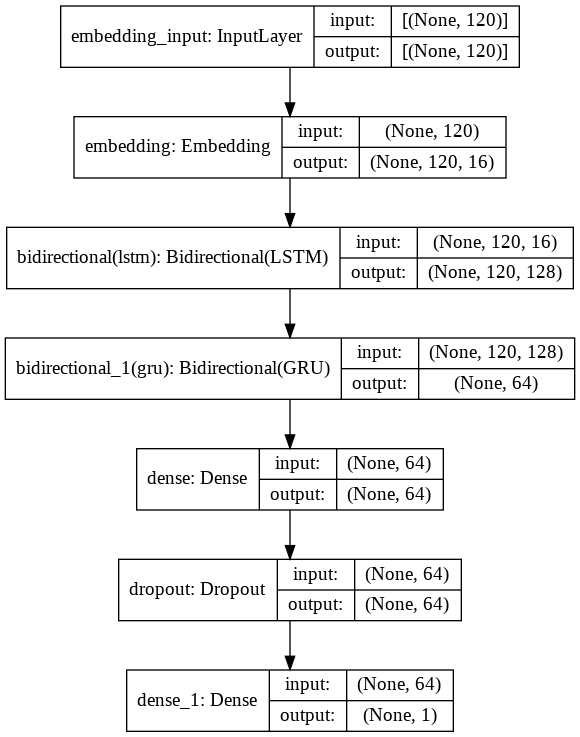

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_mobile.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_loss, test_acc = model.evaluate(testing_padded,y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

287/287 [==============================] - 12s 40ms/step - loss: 0.2835 - accuracy: 0.9187
Test Loss: 0.2834606170654297
Test Accuracy: 0.9187124967575073


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.622854084149003)

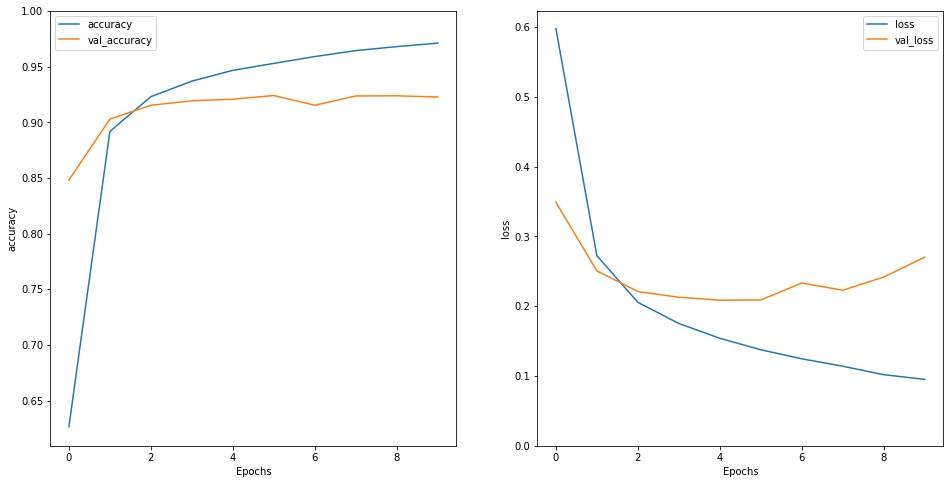

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('mvec.tsv', 'w', encoding='utf-8')
out_m = io.open('mmeta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('mvec.tsv')
  files.download('mmeta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[3], [], [3883], [742], [8], [3026], [3026], [521], [], [114], [3061], [3], [1654], [3130], [], [114], [3061], [3], [411], [], [3], [411], [], [8], [1085], [8], [1296], [3], [1654], [718], [], [], [3061], [1575], [1654], [742], [411], [114], []]


In [ ]:
cnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
cnn_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           1568      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
cnn_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
cnn_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           1568      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
num_epochs = 10
cnn_lstm_hist = cnn_lstm.fit(padded, y_train, epochs=num_epochs, validation_split=0.3)

Epoch 1/10
602/602 [==============================] - 104s 121ms/step - loss: 0.5386 - accuracy: 0.6664 - val_loss: 0.2974 - val_accuracy: 0.8715
Epoch 2/10
602/602 [==============================] - 71s 119ms/step - loss: 0.2494 - accuracy: 0.9031 - val_loss: 0.2280 - val_accuracy: 0.9080
Epoch 3/10
602/602 [==============================] - 71s 118ms/step - loss: 0.1877 - accuracy: 0.9290 - val_loss: 0.2138 - val_accuracy: 0.9157
Epoch 4/10
602/602 [==============================] - 71s 118ms/step - loss: 0.1580 - accuracy: 0.9428 - val_loss: 0.2326 - val_accuracy: 0.9066
Epoch 5/10
602/602 [==============================] - 71s 118ms/step - loss: 0.1357 - accuracy: 0.9529 - val_loss: 0.2193 - val_accuracy: 0.9214
Epoch 6/10
602/602 [==============================] - 71s 119ms/step - loss: 0.1183 - accuracy: 0.9610 - val_loss: 0.2152 - val_accuracy: 0.9165
Epoch 7/10
602/602 [==============================] - 71s 118ms/step - loss: 0.1060 - accuracy: 0.9663 - val_loss: 0.2418 - val_a

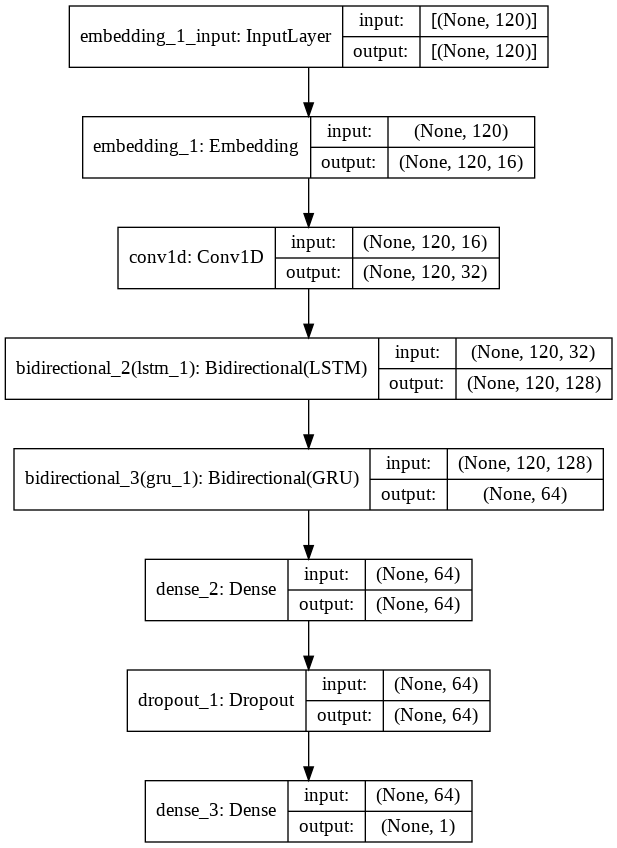

In [ ]:
tf.keras.utils.plot_model(cnn_lstm, to_file='cnn_lstm_mobile.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_loss, test_acc = cnn_lstm.evaluate(testing_padded,y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

287/287 [==============================] - 12s 41ms/step - loss: 0.2739 - accuracy: 0.9138
Test Loss: 0.2738507091999054
Test Accuracy: 0.9138025045394897


(0.0, 0.5614011779427528)

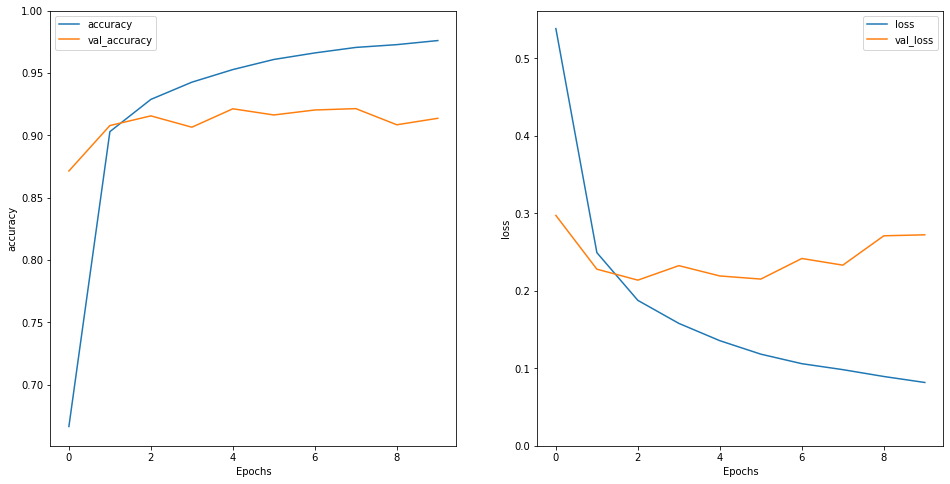

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(cnn_lstm_hist, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(cnn_lstm_hist, 'loss')
plt.ylim(0, None)

In [ ]:
f = model.layers[0]
weights_cnn = f.get_weights()[0]
print(weights_cnn.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [ ]:
import io

out_v = io.open('mvec_cnn.tsv', 'w', encoding='utf-8')
out_m = io.open('mmeta_cnn.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights_cnn[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('mvec_cnn.tsv')
  files.download('mmeta_cnn.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **hotel**

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import random
import numpy as np
from torchtext.legacy import data
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 1234
from tqdm import tqdm
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
#%%
dataset=pd.read_excel('/content/drive/MyDrive/hotel.xlsx')
dataset.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Rating', 'Unnamed: 3', 'Review',
       'Unnamed: 5', 'Sentiment'],
      dtype='object')

In [ ]:
dataset=dataset[['Rating','Review']]

In [ ]:
pos_data=dataset[dataset.Rating==5]
neg_data=dataset[dataset.Rating<3]


In [ ]:
hotel_data=pd.concat([pos_data[:40000],neg_data[:40000]])

In [ ]:
hotel_data.Rating.replace(2,0,inplace=True)
hotel_data.Rating.replace(1,0,inplace=True)
hotel_data.Rating.replace(5,1,inplace=True)

In [ ]:
data=hotel_data.Review.astype(str)
label=hotel_data.Rating

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.values,
                                                    label.values,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
vocab_size = 15000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(X_train[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? i have been going to veronica's for years and this place is just amazing my favorite is the stewed chicken but the oxtail and curry chicken are legit as well i haven't had the seafood yet but have heard good things and will certainly give it a try today i <OOV> the <OOV> feet soup which was absolutely gluttonous
I have been going to Veronica's for years and this place is just amazing. My favorite is the stewed chicken but the oxtail and curry chicken are legit as well. I haven't had the seafood yet but have heard good things and will certainly give it a try. Today, I demolished the Cow's Feet soup which was absolutely gluttonous.


In [ ]:
hotel = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
hotel.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
hotel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           240000    
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 316,801
Trainable params: 316,801
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 10
h_history = hotel.fit(padded, y_train, epochs=num_epochs, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 313s 233ms/step - loss: 0.3821 - accuracy: 0.7811 - val_loss: 0.1731 - val_accuracy: 0.9309
Epoch 2/10
1313/1313 [==============================] - 303s 231ms/step - loss: 0.1531 - accuracy: 0.9419 - val_loss: 0.1473 - val_accuracy: 0.9419
Epoch 3/10
1313/1313 [==============================] - 302s 230ms/step - loss: 0.1140 - accuracy: 0.9577 - val_loss: 0.1618 - val_accuracy: 0.9388
Epoch 4/10
1313/1313 [==============================] - 303s 231ms/step - loss: 0.0942 - accuracy: 0.9670 - val_loss: 0.1584 - val_accuracy: 0.9445
Epoch 5/10
1313/1313 [==============================] - 314s 239ms/step - loss: 0.0752 - accuracy: 0.9735 - val_loss: 0.1729 - val_accuracy: 0.9461
Epoch 6/10
1313/1313 [==============================] - 312s 238ms/step - loss: 0.0622 - accuracy: 0.9792 - val_loss: 0.1806 - val_accuracy: 0.9412
Epoch 7/10
1313/1313 [==============================] - 311s 237ms/step - loss: 0.0517 - accuracy: 0.9835 - val_

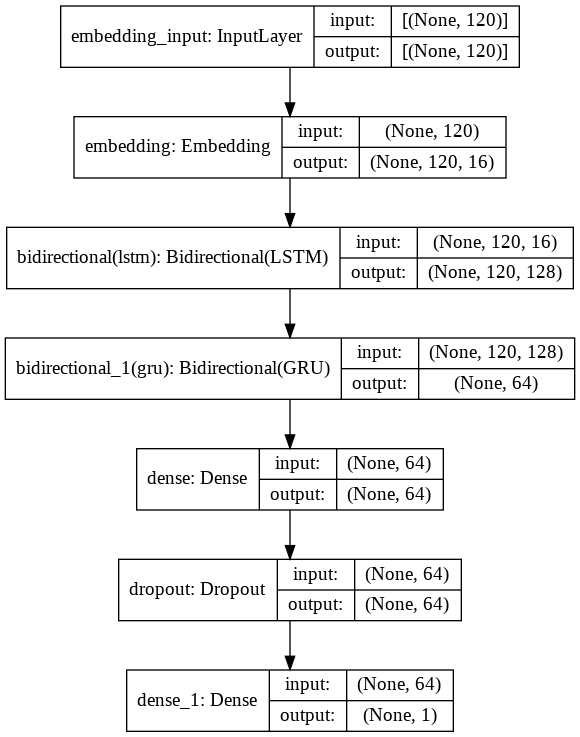

In [ ]:
tf.keras.utils.plot_model(hotel, to_file='model_mobile.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_loss, test_acc = hotel.evaluate(testing_padded,y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

625/625 [==============================] - 32s 49ms/step - loss: 0.2223 - accuracy: 0.9460
Test Loss: 0.22228014469146729
Test Accuracy: 0.9460499882698059


(0.0, 0.3996711127460003)

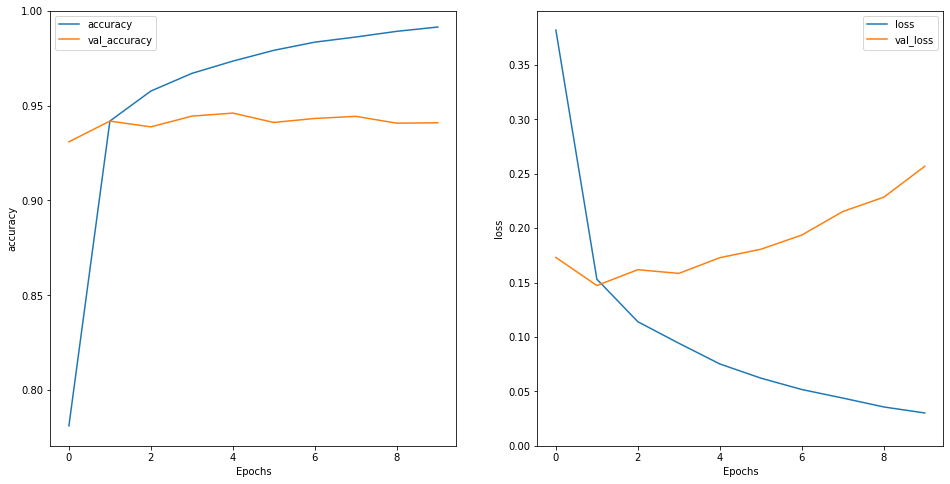

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(h_history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(h_history, 'loss')
plt.ylim(0, None)

In [ ]:
g = hotel.layers[0]
weights_cnn = g.get_weights()[0]
print(weights_cnn.shape) # shape: (vocab_size, embedding_dim)

(15000, 16)


In [ ]:
import io

out_v = io.open('hvec_cnn.tsv', 'w', encoding='utf-8')
out_m = io.open('hmeta_cnn.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights_cnn[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('hvec_cnn.tsv')
  files.download('hmeta_cnn.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hcnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
hcnn_lstm.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
hcnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           240000    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           1568      
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                31104     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
num_epochs = 10
h_cnn_history = hcnn_lstm.fit(padded, y_train, epochs=num_epochs, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 323s 240ms/step - loss: 0.3861 - accuracy: 0.7799 - val_loss: 0.1889 - val_accuracy: 0.9229
Epoch 2/10
1313/1313 [==============================] - 315s 240ms/step - loss: 0.1538 - accuracy: 0.9438 - val_loss: 0.1538 - val_accuracy: 0.9424
Epoch 3/10
1313/1313 [==============================] - 316s 241ms/step - loss: 0.1135 - accuracy: 0.9591 - val_loss: 0.1571 - val_accuracy: 0.9432
Epoch 4/10
1313/1313 [==============================] - 317s 242ms/step - loss: 0.0905 - accuracy: 0.9678 - val_loss: 0.1511 - val_accuracy: 0.9472
Epoch 5/10
1313/1313 [==============================] - 317s 241ms/step - loss: 0.0736 - accuracy: 0.9742 - val_loss: 0.1583 - val_accuracy: 0.9421
Epoch 6/10
1313/1313 [==============================] - 318s 242ms/step - loss: 0.0623 - accuracy: 0.9789 - val_loss: 0.1658 - val_accuracy: 0.9445
Epoch 7/10
1313/1313 [==============================] - 319s 243ms/step - loss: 0.0495 - accuracy: 0.9849 - val_

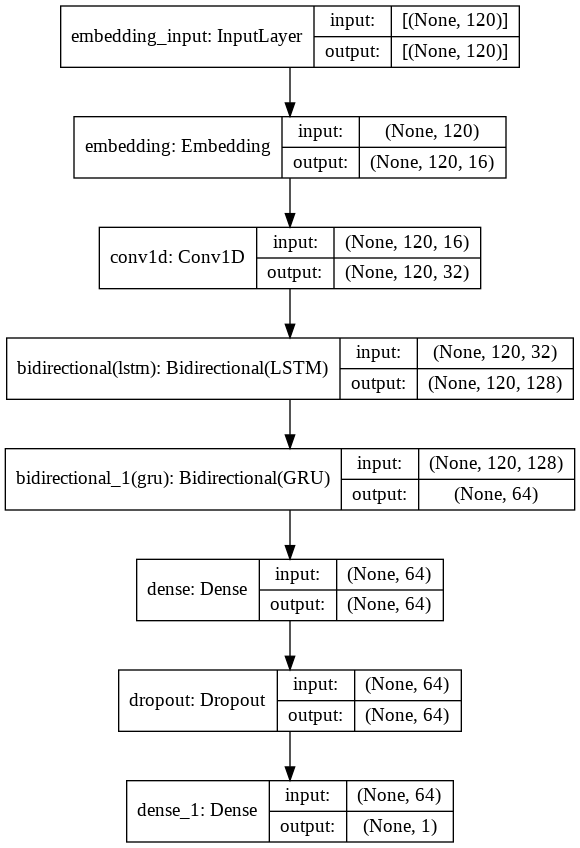

In [ ]:
tf.keras.utils.plot_model(hcnn_lstm, to_file='model_mobile.png', show_shapes=True, show_layer_names=True)

In [ ]:
test_loss, test_acc = hcnn_lstm.evaluate(testing_padded,y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

625/625 [==============================] - 32s 48ms/step - loss: 0.2322 - accuracy: 0.9441
Test Loss: 0.2322380542755127
Test Accuracy: 0.9440500140190125


(0.0, 0.4039160493761301)

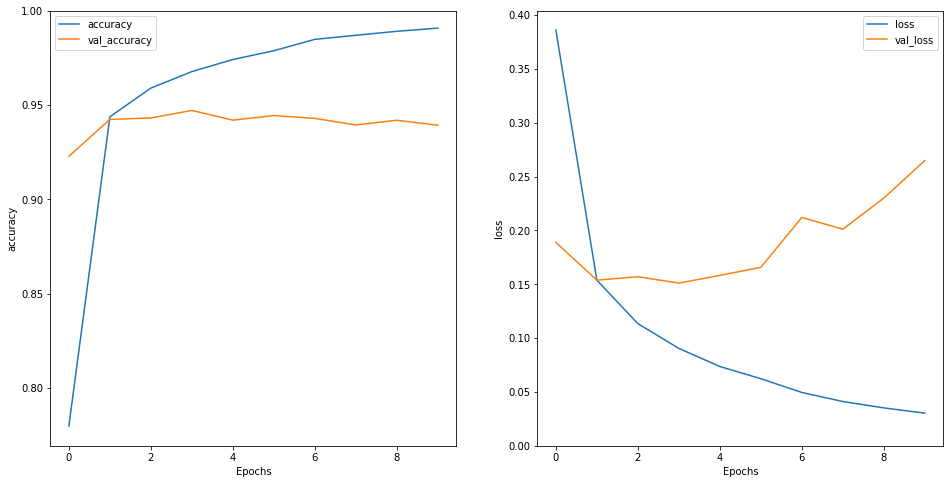

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(h_cnn_history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(h_cnn_history, 'loss')
plt.ylim(0, None)

In [ ]:
g = hcnn_lstm.layers[0]
weights_cnn = g.get_weights()[0]
print(weights_cnn.shape) # shape: (vocab_size, embedding_dim)

(15000, 16)


In [ ]:
import io

out_v = io.open('hvec_cnn_lstm.tsv', 'w', encoding='utf-8')
out_m = io.open('hmeta_cnn_lstm.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights_cnn[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('hvec_cnn_lstm.tsv')
  files.download('hmeta_cnn_lstm.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>